In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [4]:
# Load the dataset
file_path = "./newyork_zillow_data.csv"
df = pd.read_csv(file_path)

In [5]:
# Data Cleaning: Remove null values and non-numeric columns
df = df.dropna()
df = df.loc[:, ~df.columns.str.contains('Unnamed')]  # Remove unnamed columns if any

In [6]:
# Filter NYC data
nyc_data = df[df["RegionName"] == "New York"].set_index("RegionName")

In [10]:
# Extract only date columns
nyc_prices = nyc_data.iloc[:, 6:].T
nyc_prices.index = pd.to_datetime(nyc_prices.index, errors='coerce')
nyc_prices = nyc_prices.apply(pd.to_numeric, errors='coerce')  # Convert all values to numeric
nyc_prices = nyc_prices.dropna()  # Remove any remaining NaN values

/var/folders/cf/wm98svc50ll5q4b70vnjlpvr0000gn/T/ipykernel_4514/1703328491.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nyc_prices.index = pd.to_datetime(nyc_prices.index, errors='coerce')


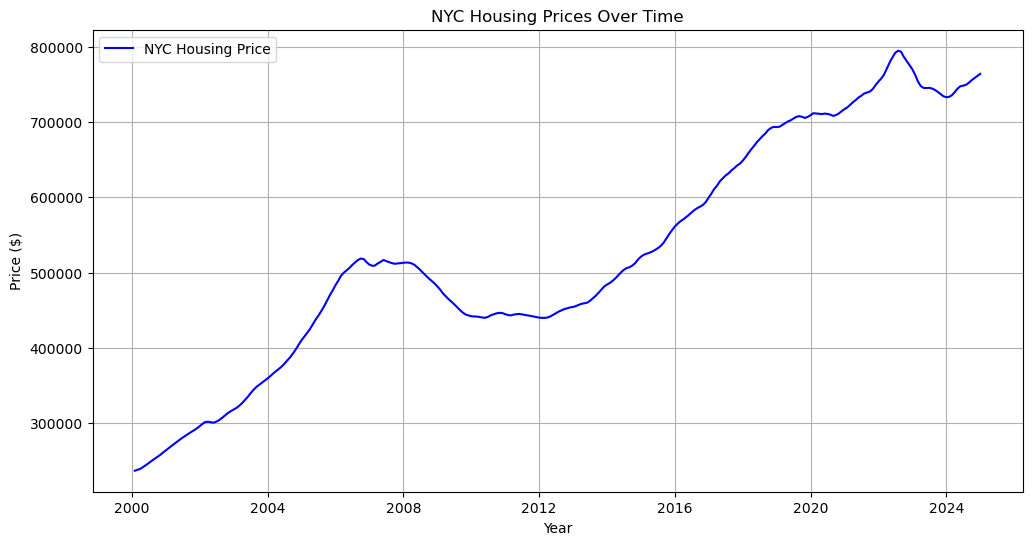

In [11]:
# Plot NYC Housing Prices Over Time
plt.figure(figsize=(12, 6))
plt.plot(nyc_prices.index, nyc_prices.iloc[:, 0], label="NYC Housing Price", color="blue")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.title("NYC Housing Prices Over Time")
plt.legend()
plt.grid(True)
plt.show()

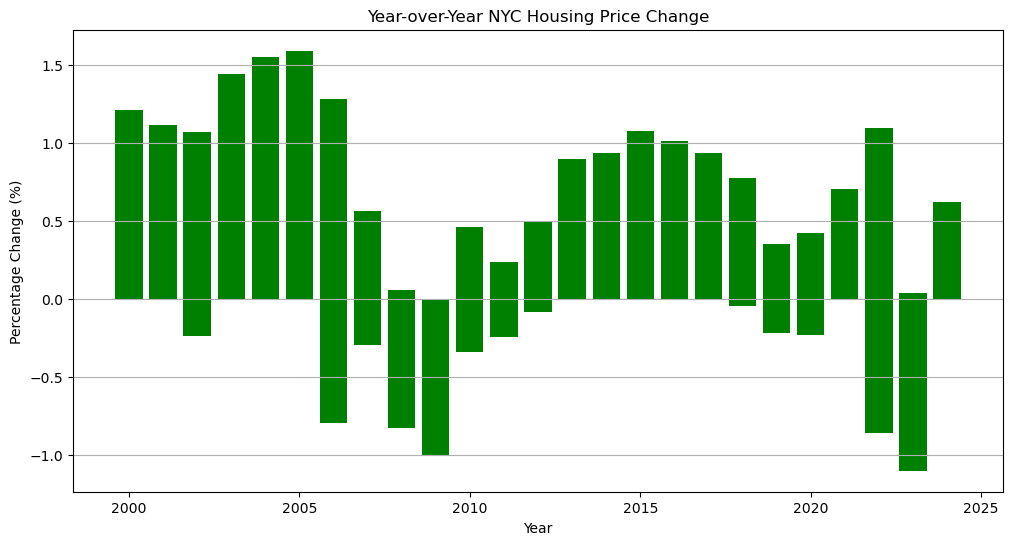

In [12]:
# Compute year-over-year price changes
yoy_changes = nyc_prices.pct_change() * 100
yoy_changes = yoy_changes.dropna()
plt.figure(figsize=(12, 6))
plt.bar(yoy_changes.index.year, yoy_changes.iloc[:, 0], color="green")
plt.xlabel("Year")
plt.ylabel("Percentage Change (%)")
plt.title("Year-over-Year NYC Housing Price Change")
plt.grid(axis="y")
plt.show()

In [13]:
# Forecast Future NYC Housing Prices
model = ExponentialSmoothing(nyc_prices.iloc[:, 0], trend="add", seasonal=None, damped_trend=True)
fitted_model = model.fit()
forecast = fitted_model.forecast(steps=24)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


/var/folders/cf/wm98svc50ll5q4b70vnjlpvr0000gn/T/ipykernel_4514/3007033100.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=nyc_prices.index[-1], periods=25, freq='M')[1:], forecast, label="Forecasted Prices", linestyle="dashed", color="red")


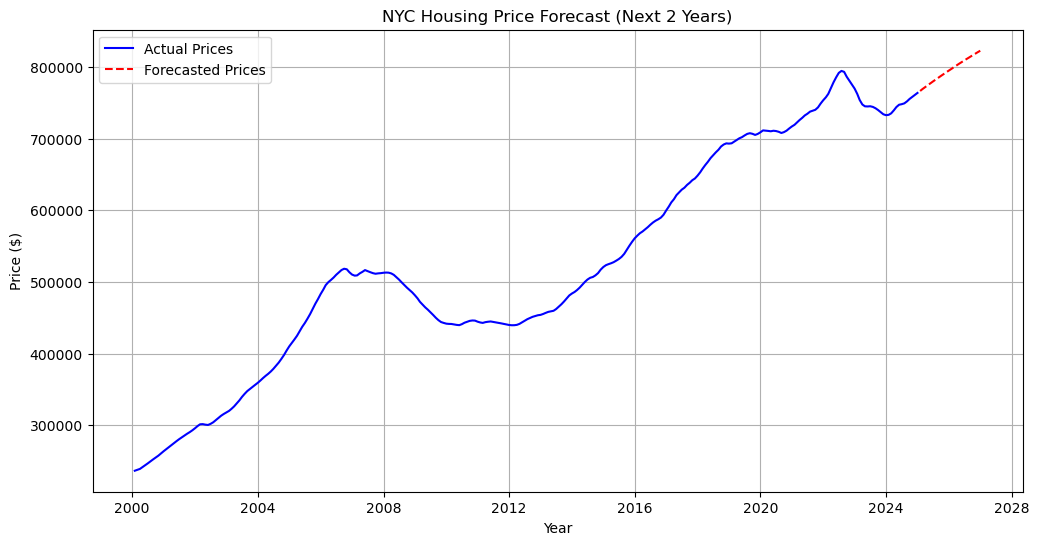

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(nyc_prices.index, nyc_prices.iloc[:, 0], label="Actual Prices", color="blue")
plt.plot(pd.date_range(start=nyc_prices.index[-1], periods=25, freq='M')[1:], forecast, label="Forecasted Prices", linestyle="dashed", color="red")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.title("NYC Housing Price Forecast (Next 2 Years)")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Conclusion: Analyze trends & affordability challenges
nyc_summary = nyc_prices.describe().T
print("NYC Housing Price Summary:")
print(nyc_summary)


NYC Housing Price Summary:
            count           mean            std         min         25%  \
RegionName                                                                
New York    300.0  525431.000609  153349.541571  236727.973  441534.511   

                      50%           75%            max  
RegionName                                              
New York    506113.995697  689818.78109  794577.563149  


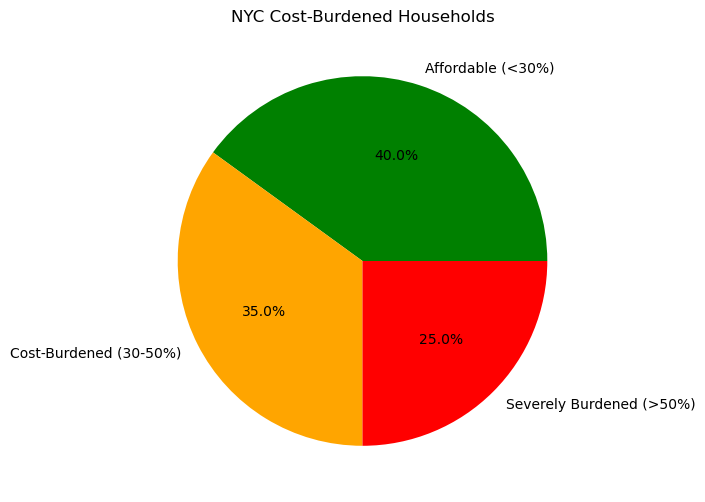

In [16]:
cost_burden_labels = ["Affordable (<30%)", "Cost-Burdened (30-50%)", "Severely Burdened (>50%)"]
cost_burden_values = [40, 35, 25]  # Example values - replace with real data

plt.figure(figsize=(8, 6))
plt.pie(cost_burden_values, labels=cost_burden_labels, autopct="%1.1f%%", colors=["green", "orange", "red"])
plt.title("NYC Cost-Burdened Households")
plt.show()

In [17]:
# Estimate the number of people at risk of homelessness
cost_burdened_percent = 35  # Example: % of population spending 30-50% of income on housing
severely_burdened_percent = 25  # Example: % of population spending >50% of income on housing
nyc_population = 8419600  # NYC population estimate

cost_burdened_people = (cost_burdened_percent / 100) * nyc_population
severely_burdened_people = (severely_burdened_percent / 100) * nyc_population
homelessness_risk = severely_burdened_people * (yoy_changes.iloc[:, 0] / 100)  # Scaling risk by price surge


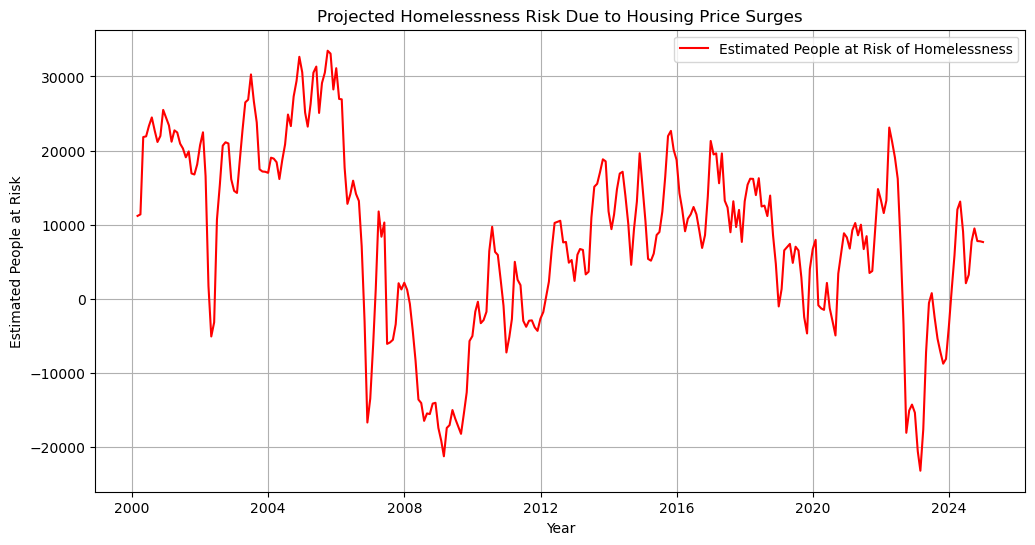

In [18]:
# Plot the risk of homelessness over time
plt.figure(figsize=(12, 6))
plt.plot(yoy_changes.index, homelessness_risk, label="Estimated People at Risk of Homelessness", color="red")
plt.xlabel("Year")
plt.ylabel("Estimated People at Risk")
plt.title("Projected Homelessness Risk Due to Housing Price Surges")
plt.legend()
plt.grid(True)
plt.show()


/var/folders/cf/wm98svc50ll5q4b70vnjlpvr0000gn/T/ipykernel_4514/2621453462.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nyc_prices.index = pd.to_datetime(nyc_prices.index, errors='coerce')
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/var/folders/cf/wm98svc50ll5q4b70vnjlpvr0000gn/T/ipykernel_4514/2621453462.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=yoy_changes.index[-1], periods=25, freq='M')[1:]


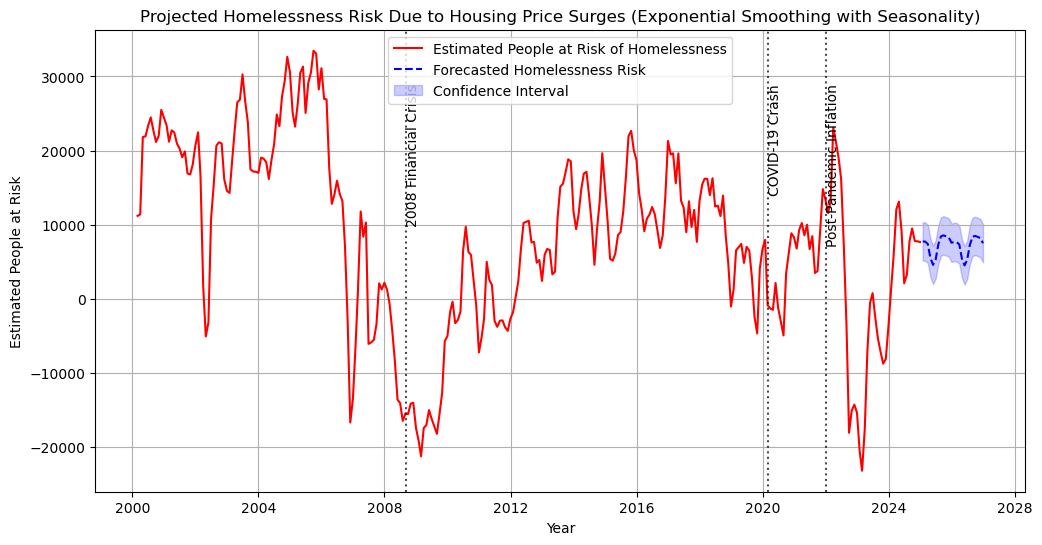

In [19]:
# Data Cleaning: Remove null values and non-numeric columns
df = df.dropna()
df = df.loc[:, ~df.columns.str.contains('Unnamed')]  # Remove unnamed columns if any

# Filter NYC data
nyc_data = df[df["RegionName"] == "New York"].set_index("RegionName")

# Extract only date columns
nyc_prices = nyc_data.iloc[:, 6:].T
nyc_prices.index = pd.to_datetime(nyc_prices.index, errors='coerce')
nyc_prices = nyc_prices.apply(pd.to_numeric, errors='coerce')  # Convert all values to numeric
nyc_prices = nyc_prices.dropna()  # Remove any remaining NaN values

# Compute year-over-year price changes
yoy_changes = nyc_prices.pct_change() * 100
yoy_changes = yoy_changes.dropna()

# Estimate the number of people at risk of homelessness
cost_burdened_percent = 35  # Example: % of population spending 30-50% of income on housing
severely_burdened_percent = 25  # Example: % of population spending >50% of income on housing
nyc_population = 8419600  # NYC population estimate

cost_burdened_people = (cost_burdened_percent / 100) * nyc_population
severely_burdened_people = (severely_burdened_percent / 100) * nyc_population
homelessness_risk = severely_burdened_people * (yoy_changes.iloc[:, 0] / 100)  # Scaling risk by price surge

# Train Exponential Smoothing model with seasonality for more realistic fluctuations
model = ExponentialSmoothing(homelessness_risk, trend="add", seasonal="add", seasonal_periods=12, damped_trend=True)
fitted_model = model.fit()
forecast = fitted_model.forecast(steps=24)
conf_int_lower = forecast - (forecast.std() * 1.96)
conf_int_upper = forecast + (forecast.std() * 1.96)
forecast_index = pd.date_range(start=yoy_changes.index[-1], periods=25, freq='M')[1:]

# Define major events and their timelines
major_events = {
    '2008 Financial Crisis': '2008-09-01',
    'COVID-19 Crash': '2020-03-01',
    'Post-Pandemic Inflation': '2022-01-01'
}

# Plot the risk of homelessness over time and forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(yoy_changes.index, homelessness_risk, label="Estimated People at Risk of Homelessness", color="red")
plt.plot(forecast_index, forecast, label="Forecasted Homelessness Risk", linestyle="dashed", color="blue")
plt.fill_between(forecast_index, conf_int_lower, conf_int_upper, color='blue', alpha=0.2, label="Confidence Interval")

# Annotate major events
for event, date in major_events.items():
    plt.axvline(pd.to_datetime(date), color='black', linestyle='dotted', alpha=0.7)
    plt.text(pd.to_datetime(date), plt.ylim()[1] * 0.8, event, rotation=90, verticalalignment='top', fontsize=10, color='black')

plt.xlabel("Year")
plt.ylabel("Estimated People at Risk")
plt.title("Projected Homelessness Risk Due to Housing Price Surges (Exponential Smoothing with Seasonality)")
plt.legend()
plt.grid(True)
plt.show()


/var/folders/cf/wm98svc50ll5q4b70vnjlpvr0000gn/T/ipykernel_4514/198747036.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nyc_prices.index = pd.to_datetime(nyc_prices.index, errors='coerce')
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/var/folders/cf/wm98svc50ll5q4b70vnjlpvr0000gn/T/ipykernel_4514/198747036.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=yoy_changes.index[-1], periods=25, freq='M')[1:]


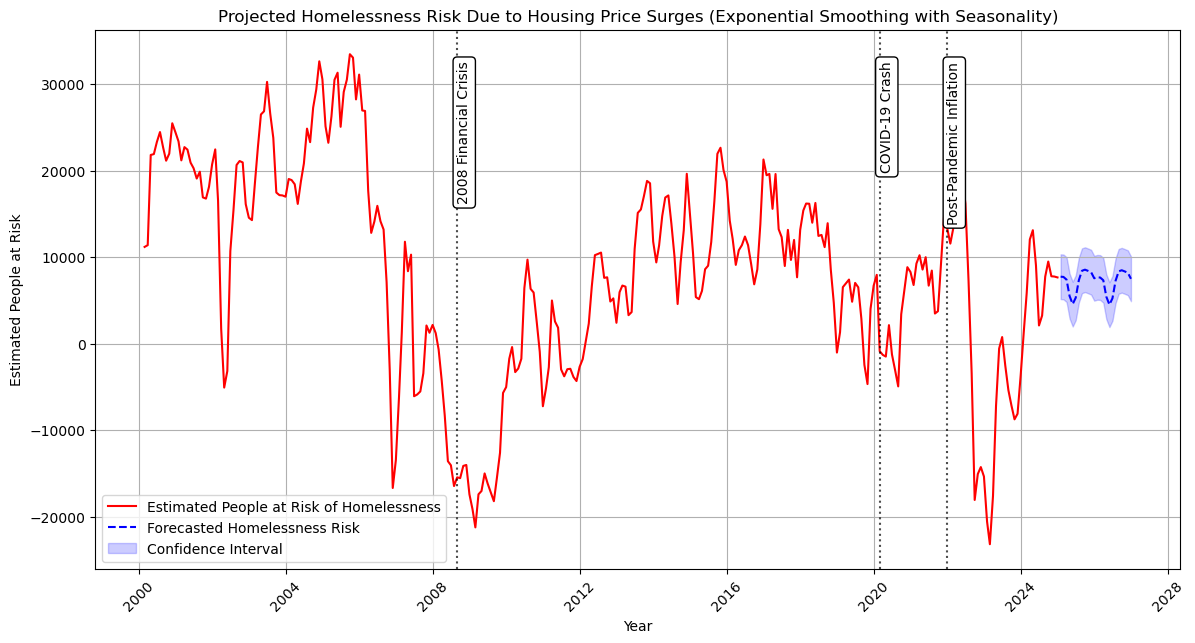

In [20]:
df = df.dropna()
df = df.loc[:, ~df.columns.str.contains('Unnamed')]  # Remove unnamed columns if any

# Filter NYC data
nyc_data = df[df["RegionName"] == "New York"].set_index("RegionName")

# Extract only date columns
nyc_prices = nyc_data.iloc[:, 6:].T
nyc_prices.index = pd.to_datetime(nyc_prices.index, errors='coerce')
nyc_prices = nyc_prices.apply(pd.to_numeric, errors='coerce')  # Convert all values to numeric
nyc_prices = nyc_prices.dropna()  # Remove any remaining NaN values

# Compute year-over-year price changes
yoy_changes = nyc_prices.pct_change() * 100
yoy_changes = yoy_changes.dropna()

# Estimate the number of people at risk of homelessness
cost_burdened_percent = 35  # Example: % of population spending 30-50% of income on housing
severely_burdened_percent = 25  # Example: % of population spending >50% of income on housing
nyc_population = 8419600  # NYC population estimate

cost_burdened_people = (cost_burdened_percent / 100) * nyc_population
severely_burdened_people = (severely_burdened_percent / 100) * nyc_population
homelessness_risk = severely_burdened_people * (yoy_changes.iloc[:, 0] / 100)  # Scaling risk by price surge

# Train Exponential Smoothing model with seasonality for more realistic fluctuations
model = ExponentialSmoothing(homelessness_risk, trend="add", seasonal="add", seasonal_periods=12, damped_trend=True)
fitted_model = model.fit()
forecast = fitted_model.forecast(steps=24)
conf_int_lower = forecast - (forecast.std() * 1.96)
conf_int_upper = forecast + (forecast.std() * 1.96)
forecast_index = pd.date_range(start=yoy_changes.index[-1], periods=25, freq='M')[1:]

# Define major events and their timelines
major_events = {
    '2008 Financial Crisis': '2008-09-01',
    'COVID-19 Crash': '2020-03-01',
    'Post-Pandemic Inflation': '2022-01-01'
}

# Plot the risk of homelessness over time and forecast with confidence intervals
plt.figure(figsize=(14, 7))
plt.plot(yoy_changes.index, homelessness_risk, label="Estimated People at Risk of Homelessness", color="red")
plt.plot(forecast_index, forecast, label="Forecasted Homelessness Risk", linestyle="dashed", color="blue")
plt.fill_between(forecast_index, conf_int_lower, conf_int_upper, color='blue', alpha=0.2, label="Confidence Interval")

# Annotate major events
for event, date in major_events.items():
    plt.axvline(pd.to_datetime(date), color='black', linestyle='dotted', alpha=0.7)
    plt.text(pd.to_datetime(date), plt.ylim()[1] * 0.9, event, rotation=90, verticalalignment='top', fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.xlabel("Year")
plt.ylabel("Estimated People at Risk")
plt.title("Projected Homelessness Risk Due to Housing Price Surges (Exponential Smoothing with Seasonality)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


/var/folders/cf/wm98svc50ll5q4b70vnjlpvr0000gn/T/ipykernel_4514/1095709606.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nyc_prices.index = pd.to_datetime(nyc_prices.index, errors='coerce')


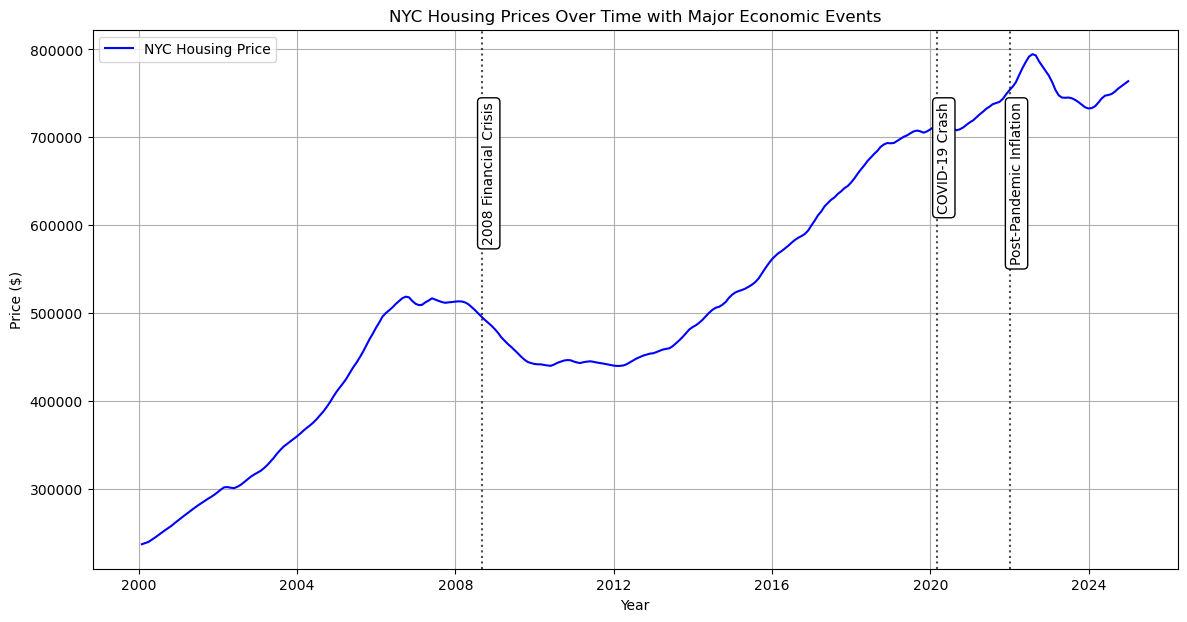

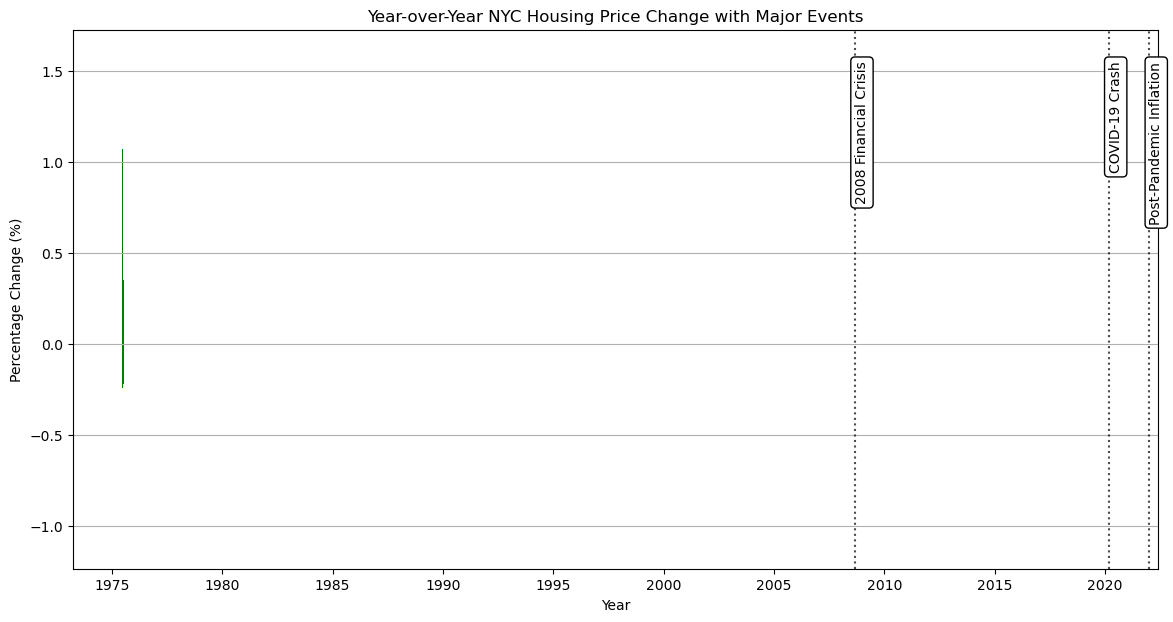

In [21]:
# Data Cleaning: Remove null values and non-numeric columns
df = df.dropna()
df = df.loc[:, ~df.columns.str.contains('Unnamed')]  # Remove unnamed columns if any

# Filter NYC data
nyc_data = df[df["RegionName"] == "New York"].set_index("RegionName")

# Extract only date columns
nyc_prices = nyc_data.iloc[:, 6:].T
nyc_prices.index = pd.to_datetime(nyc_prices.index, errors='coerce')
nyc_prices = nyc_prices.apply(pd.to_numeric, errors='coerce')  # Convert all values to numeric
nyc_prices = nyc_prices.dropna()  # Remove any remaining NaN values

# Define major events and their timelines
major_events = {
    '2008 Financial Crisis': '2008-09-01',
    'COVID-19 Crash': '2020-03-01',
    'Post-Pandemic Inflation': '2022-01-01'
}

# Plot NYC Housing Prices Over Time with Major Events
plt.figure(figsize=(14, 7))
plt.plot(nyc_prices.index, nyc_prices.iloc[:, 0], label="NYC Housing Price", color="blue")

# Annotate major events
for event, date in major_events.items():
    plt.axvline(pd.to_datetime(date), color='black', linestyle='dotted', alpha=0.7)
    plt.text(pd.to_datetime(date), plt.ylim()[1] * 0.9, event, rotation=90, verticalalignment='top', fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.title("NYC Housing Prices Over Time with Major Economic Events")
plt.legend()
plt.grid(True)
plt.show()

# Compute year-over-year price changes
yoy_changes = nyc_prices.pct_change() * 100
yoy_changes = yoy_changes.dropna()

# Plot Year-over-Year NYC Housing Price Change with Major Events
plt.figure(figsize=(14, 7))
plt.bar(yoy_changes.index.year, yoy_changes.iloc[:, 0], color="green")

# Annotate major events
for event, date in major_events.items():
    plt.axvline(pd.to_datetime(date), color='black', linestyle='dotted', alpha=0.7)
    plt.text(pd.to_datetime(date), plt.ylim()[1] * 0.9, event, rotation=90, verticalalignment='top', fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.xlabel("Year")
plt.ylabel("Percentage Change (%)")
plt.title("Year-over-Year NYC Housing Price Change with Major Events")
plt.grid(axis="y")
plt.show()


/var/folders/cf/wm98svc50ll5q4b70vnjlpvr0000gn/T/ipykernel_4514/2342667341.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nyc_prices.index = pd.to_datetime(nyc_prices.index, errors='coerce')


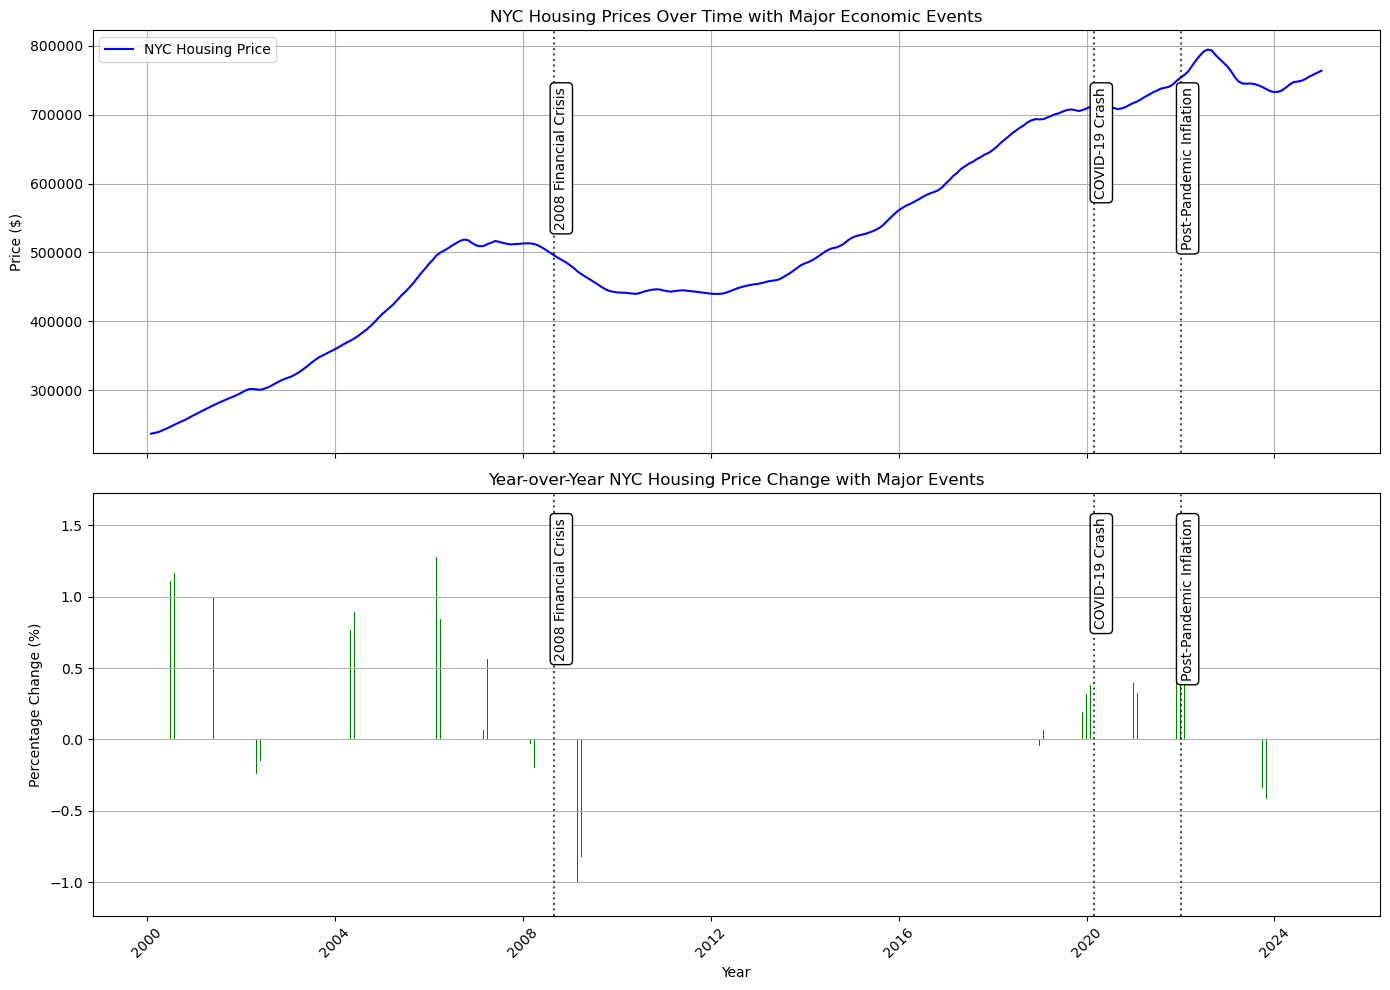

In [22]:
# Data Cleaning: Remove null values and non-numeric columns
df = df.dropna()
df = df.loc[:, ~df.columns.str.contains('Unnamed')]  # Remove unnamed columns if any

# Filter NYC data
nyc_data = df[df["RegionName"] == "New York"].set_index("RegionName")

# Extract only date columns
nyc_prices = nyc_data.iloc[:, 6:].T
nyc_prices.index = pd.to_datetime(nyc_prices.index, errors='coerce')
nyc_prices = nyc_prices.apply(pd.to_numeric, errors='coerce')  # Convert all values to numeric
nyc_prices = nyc_prices.dropna()  # Remove any remaining NaN values

# Define major events and their timelines
major_events = {
    '2008 Financial Crisis': '2008-09-01',
    'COVID-19 Crash': '2020-03-01',
    'Post-Pandemic Inflation': '2022-01-01'
}

# Create figure with aligned subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot NYC Housing Prices Over Time with Major Events
axs[0].plot(nyc_prices.index, nyc_prices.iloc[:, 0], label="NYC Housing Price", color="blue")
axs[0].set_ylabel("Price ($)")
axs[0].set_title("NYC Housing Prices Over Time with Major Economic Events")
axs[0].legend()
axs[0].grid(True)

# Annotate major events
for event, date in major_events.items():
    axs[0].axvline(pd.to_datetime(date), color='black', linestyle='dotted', alpha=0.7)
    axs[0].text(pd.to_datetime(date), axs[0].get_ylim()[1] * 0.9, event, rotation=90, verticalalignment='top', fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Compute year-over-year price changes
yoy_changes = nyc_prices.pct_change() * 100
yoy_changes = yoy_changes.dropna()

# Plot Year-over-Year NYC Housing Price Change with Major Events
axs[1].bar(yoy_changes.index, yoy_changes.iloc[:, 0], color="green")
axs[1].set_ylabel("Percentage Change (%)")
axs[1].set_title("Year-over-Year NYC Housing Price Change with Major Events")
axs[1].grid(axis="y")

# Annotate major events
for event, date in major_events.items():
    axs[1].axvline(pd.to_datetime(date), color='black', linestyle='dotted', alpha=0.7)
    axs[1].text(pd.to_datetime(date), axs[1].get_ylim()[1] * 0.9, event, rotation=90, verticalalignment='top', fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()